#  SHARE-seq mouse skin

In [1]:
import shutup
shutup.please()

import scanpy as sc
from tivelo.main import tivelo
from baseline import run_baseline

(Running UniTVelo 0.2.5.2)
2024-05-18 09:07:52


## Run TIVelo
Load the dataset. Set the data name with key for cluster, key for embedding and cluster edges (for comparison).

In [2]:
data_name = "MouseSkin"
rna_path = "D:/cuhk/project/velocity/dataset/atac/MouseSkin/adata_postpro.h5ad"
atac_path = "D:/cuhk/project/velocity/dataset/atac/MouseSkin/adata_atac_postpro.h5ad"
adata = sc.read(rna_path)
adata_atac = sc.read(atac_path)

group_key = "celltype"
emb_key = "X_umap"
cluster_edges = [('TAC-1', 'TAC-2'), ('TAC-2', 'Hair shaft cuticle/cortex'), ('TAC-2', 'IRS'), ('TAC-2', 'Medulla')]

Set the model parameters.

In [3]:
save_folder = "results"
show_fig = True
filter_genes = True
save_coeff = True
constrain = True
loss_fun = "mse"
only_s = False
alpha_1 = 1
alpha_2 = 0.1
batch_size = 1024
n_epochs = 100

tree_gene = None
show_DTI = False
adjust_DTI = False
velocity_key = "velocity"
measure_performance = True

Run the model by function tivelo.

recovering dynamics (using 20/20 cores)


  0%|          | 0/141 [00:00<?, ?gene/s]

    finished (0:00:25) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 20/20 cores)


  0%|          | 0/6436 [00:00<?, ?cells/s]

    finished (0:00:06) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 5 regions of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
'path_dict' added to adata.uns


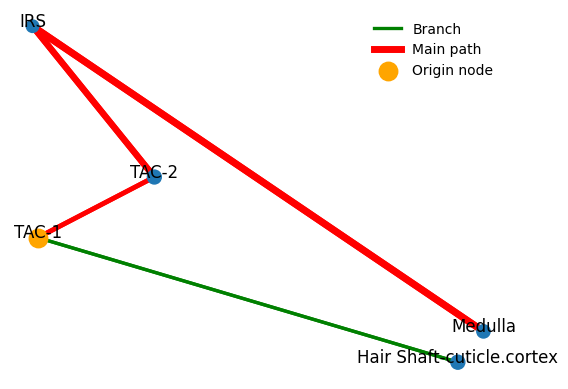


main path: ['TAC-1', 'TAC-2', 'IRS', 'Medulla']


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done  73 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done  92 out of 119 | elapsed:   21.6s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done 104 out of 119 | elapsed:   23.5s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done 116 out of 119 | elapsed:   25.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:   25.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.


mean: 1.025 
median: 1.611 
lower quantile: -6.241 
upper quantile: 8.337 
minimum: -75.903 
maximum: 177.499 
No. of positive scores: 70

branch_1: ['TAC-1', 'Hair Shaft-cuticle.cortex']


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done  73 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  92 out of 119 | elapsed:   11.8s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done 104 out of 119 | elapsed:   13.2s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 116 out of 119 | elapsed:   14.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:   14.2s finished


mean: 2.778 
median: -0.644 
lower quantile: -10.964 
upper quantile: 11.455 
minimum: -60.365 
maximum: 138.577 
No. of positive scores: 58

'path_dict' added to adata.uns
'child_dict' added to adata.uns
'level_dict' added to adata.uns
'threshold_list' added to adata.uns
'd_nn' added to adata.obsp


Model training: 100%|██████████| 100/100 [00:19<00:00,  5.17it/s, cos_s=0.945, cos_u=0.978, mse_s=0.006, mse_u=0.004]


computing velocity graph (using 20/20 cores)


  0%|          | 0/6436 [00:00<?, ?cells/s]

    finished (0:00:06) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


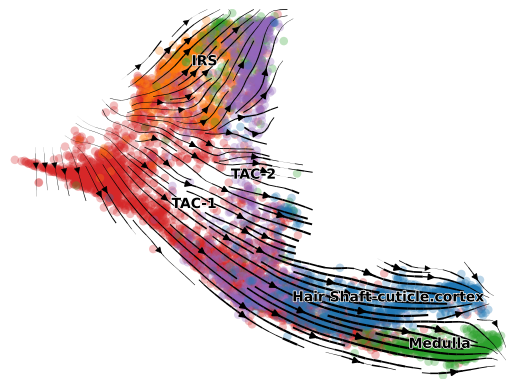

TIVelo:
 CBDir: 0.0559 ICVCoh: 0.9470 
 CBDir2: 0.1300 ICVCoh2: 0.8415 
 TransProbs: 0.2092 VeloCoh: 0.0379


In [4]:
adata_ = tivelo(adata, group_key, emb_key, data_name=data_name, save_folder=save_folder, njobs=-1, 
                start_mode="dynamical", tree_gene=tree_gene, show_fig=show_fig, filter_genes=filter_genes,
                constrain=constrain, loss_fun=loss_fun, only_s=only_s, alpha_1=alpha_1, alpha_2=alpha_2,
                batch_size=batch_size, n_epochs=n_epochs, velocity_key="velocity", adjust_DTI=adjust_DTI,
                show_DTI=show_DTI, cluster_edges=cluster_edges, measure_performance=measure_performance)

## Run MultiVelo.

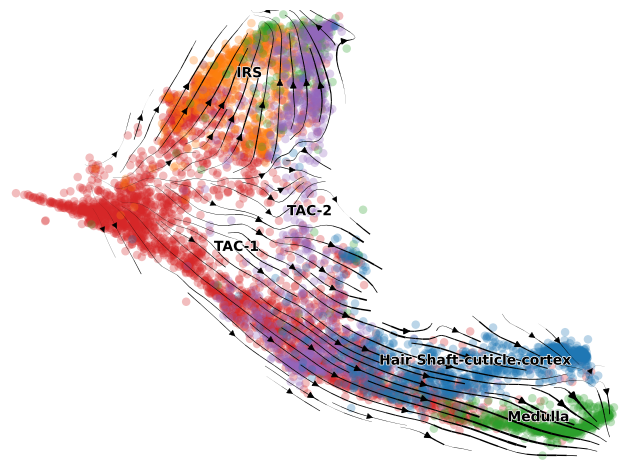

multivelo:
 CBDir: 0.1270 ICVCoh: 0.9468 
 CBDir2: -0.0191 ICVCoh2: 0.6705 
 TransProbs: 0.0642 VeloCoh: 0.0241


In [5]:
adata_multivelo = run_baseline(adata, "multivelo", data_name, group_key, emb_key, cluster_edges, 
                               adata_atac=adata_atac, show_fig=True, measure_performance=True)